#ЭКВАЛАЙЗЕР

##Библиотеки

In [ ]:
# librosa - библиотека для анализа аудиоданных
import librosa
import librosa.display
from librosa.feature import melspectrogram

# импортируем зависимости для возможности проигрывания аудио в ноутбуке
from IPython.display import Audio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Программная чать

In [ ]:
def draw_melspectrogram(file):
  S = np.abs(librosa.stft(file))
  fig, ax = plt.subplots()
  img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                          ref=np.max),
                                  y_axis='log', x_axis='time', ax=ax)
  ax.set_title('Power spectrogram')
  fig.colorbar(img, ax=ax, format="%+2.0f dB")
  plt.show()

In [ ]:
def noise(data, noise_coeff):
    noise = noise_coeff * np.random.uniform()
    data = data + noise * np.random.normal(size=data.shape[0])
    return data
def stretch(data, rate=0.5):
    return librosa.effects.time_stretch(data, rate=rate)
def pitch(data, sample_rate, pitch_factor=3):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=pitch_factor)

In [ ]:
#функция аугментации данных
def augmentate(option, file):
  if(option == "Noise"):
    file = file_path
    audio_data, sample_rate = librosa.load(file)
    print("Ввод коэффициента зашумления: ")
    noise_coeff = float(input())
    audio_data = noise(audio_data, noise_coeff)
    draw_melspectrogram(audio_data)
    return(Audio(audio_data, rate=sample_rate))
  if(option == "Stretching"):
    print("Ввод коэффициента стретчинга:")
    print("Если он больше 1, то аудиозапись будет ускорена")
    print("Если меньше 1, то аудиозапись будет замедлена")
    stretch_coeff = abs(float(input()))
    audio_data, sample_rate = librosa.load(file_path)
    audio_data = stretch(audio_data, rate=stretch_coeff)
    draw_melspectrogram(audio_data)
    return(Audio(audio_data, rate=sample_rate))
  if(option == "Pitch"):
    print("Ввод коэффициента питчинга:")
    print("Если он больше 1, то аудиозапись будет с повышенным тоном")
    print("Если меньше 1, то аудиозапись будет с пониженным тоном")
    pitch_coeff = float(input())
    file = file_path
    audio_data, sample_rate = librosa.load(file)
    audio_data = pitch(audio_data, sample_rate=sample_rate, pitch_factor=pitch_coeff)
    draw_melspectrogram(audio_data)
    return(Audio(audio_data, rate=sample_rate))

##Пользовательская часть

In [ ]:
#@title ЭКВАЛАЙЗЕР { run: "auto" }
file_path = "input.wav" #@param {type:"string"}
option = "Noise" #@param ["Noise", "Stretching", "Pitch"]
print('You selected', option)

You selected Noise


Ввод коэффициента зашумления: 
0.1


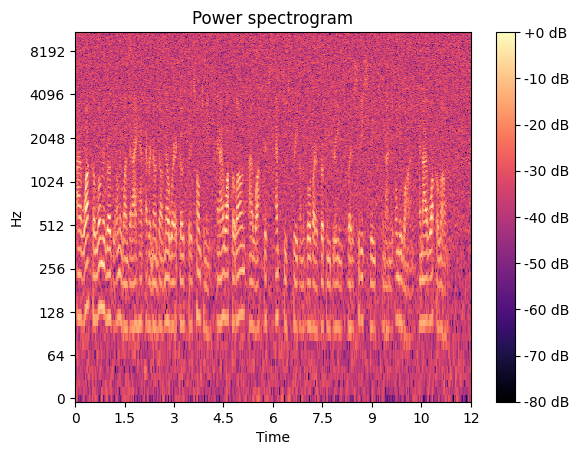

In [ ]:
augmentate(option, file_path)


#Text-to-speech/Speech-to-text

## Библиотеки

In [ ]:
!pip install nemo_toolkit['all']

In [ ]:
import nemo.collections.asr as nemo_asr

In [ ]:
!pip install gTTS

In [ ]:
from gtts import gTTS

##Программная часть

In [ ]:
asr_model = nemo_asr.models.EncDecRNNTBPEModel.from_pretrained("nvidia/stt_en_conformer_transducer_xlarge")

stt_en_conformer_transducer_xlarge.nemo:   0%|          | 0.00/2.58G [00:00<?, ?B/s]

[NeMo I 2023-11-28 16:14:18 mixins:170] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2023-11-28 16:14:19 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath:
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket1/tarred_audio_manifest.json
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket2/tarred_audio_manifest.json
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket3/tarred_audio_manifest.json
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket4/tarred_audio_manifest.json
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket5/tarred_audio_manifest.json
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket6/tarred_audio_manifest.json
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket7/tarred_audio_manifest.json
    - - /data/NeMo_ASR_SET/English/v3.0/train_bucketed/bucket8/tarred_audio_manifest.json
    sample_rate: 16000
    

[NeMo I 2023-11-28 16:14:19 features:289] PADDING: 0
[NeMo I 2023-11-28 16:14:28 rnnt_models:211] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2023-11-28 16:14:32 save_restore_connector:249] Model EncDecRNNTBPEModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--stt_en_conformer_transducer_xlarge/snapshots/96472b7552a5d0559a22399ea300498c5412699f/stt_en_conformer_transducer_xlarge.nemo.


In [ ]:
def text_to_speech():
  print("Введите текст, чтобы модель озвучила его:")
  text = input()
  language = 'ru'
  speeched_text = gTTS(text=text, lang=language, slow=False)
  speeched_text.save("output.wav")
  return 'output.wav'

def speech_to_text(file_path):
  print("Ваш текст:")
  print(asr_model.transcribe([f'{file_path}']))

## Пользовательская часть

In [ ]:
#@title Модель Text-to-speech/Speech-to-text { run: "auto" }
file_path = "input.wav" #@param {type:"string"}
option_speech = "Text-to-Speech" #@param ["Text-to-Speech", "Speech-to-Text"]
print('Выбрана опция', option_speech)

Выбрана опция Text-to-Speech


In [ ]:
Audio(f"{file_path}")

In [ ]:
if option_speech == "Text-to-Speech":
  text_to_speech()
Audio("output.wav")

Введите текст, чтобы модель озвучила его:
Привет. Как дела?


In [ ]:
if option_speech == "Speech-to-Text":
  speech_to_text(file_path)

Ваш текст:
(["i walk a lonely road the only one that i have ever known don't know where it goes but it's home to me and i walk alone i walk this empty street on the boulevard of brook in dreams where the city sleeps and i'm the only one and i walk alone"], ["i walk a lonely road the only one that i have ever known don't know where it goes but it's home to me and i walk alone i walk this empty street on the boulevard of brook in dreams where the city sleeps and i'm the only one and i walk alone"])
